# Simulación del calentador eléctrico - TP2

Curva de calentamiento sin pérdidas de calor con intervalos de 5 segundos.
Este notebook extiende el trabajo del TP1 para analizar la curva de calentamiento.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Parámetros del Calentador

In [2]:
# Parámetros iniciales (mantenemos los del TP1)
TEMPERATURA_INICIAL = 20  # Temperatura inicial del agua en °C
TEMPERATURA_AMBIENTE = 20  # Temperatura ambiente en °C
VOLTAJE = 12  # Voltaje en V
RESISTENCIA = 0.23  # Resistencia del calentador en ohmios
CALOR_ESPECIFICO = 4180  # Capacidad calorífica del agua en J/(kg·°C)
MASA_AGUA = 0.75  # Masa del agua en kg (750 ml)
TIEMPO_TOTAL = 360  # Tiempo total en segundos (6 minutos)

# Cálculo de la potencia
POTENCIA = VOLTAJE**2 / RESISTENCIA  # Potencia en Watts

## Resumen de parámetros

In [3]:
print(f"--- Parámetros del Calentador ---")
print(f"Voltaje: {VOLTAJE} V")
print(f"Resistencia: {RESISTENCIA} Ω")
print(f"Potencia Calculada: {POTENCIA:.2f} W")
print(f"Masa del agua: {MASA_AGUA} kg")
print(f"Temperatura inicial: {TEMPERATURA_INICIAL} °C")
print(f"Tiempo total simulado: {TIEMPO_TOTAL} segundos")

--- Parámetros del Calentador ---
Voltaje: 12 V
Resistencia: 0.23 Ω
Potencia Calculada: 626.09 W
Masa del agua: 0.75 kg
Temperatura inicial: 20 °C
Tiempo total simulado: 360 segundos


## Simulación de la curva de calentamiento

In [4]:
# Crear arreglo de tiempo con intervalos de 5 segundos
tiempo = np.arange(0, TIEMPO_TOTAL + 1, 5)

# Lista para almacenar las temperaturas
temperaturas = []

# Cálculo teórico para cada instante de tiempo
for t in tiempo:
    # Temperatura en función del tiempo sin pérdidas
    # T(t) = T₀ + (P × t)/(m × c)
    temperatura = TEMPERATURA_INICIAL + (POTENCIA * t) / (MASA_AGUA * CALOR_ESPECIFICO)
    temperaturas.append(temperatura)

# Convertir lista a array de NumPy
temperaturas = np.array(temperaturas)

## Resultados cada 30 segundos

In [5]:
# Imprimir las temperaturas cada 30 segundos
print("\n--- Resultados de la Simulación ---")
for i, t in enumerate(tiempo):
    if i % 6 == 0 or t == 300:  # Cada 30 segundos o en t=300s
        print(f"Segundo {t}: {temperaturas[i]:.2f}°C")


--- Resultados de la Simulación ---
Segundo 0: 20.00°C
Segundo 30: 25.99°C
Segundo 60: 31.98°C
Segundo 90: 37.97°C
Segundo 120: 43.97°C
Segundo 150: 49.96°C
Segundo 180: 55.95°C
Segundo 210: 61.94°C
Segundo 240: 67.93°C
Segundo 270: 73.92°C
Segundo 300: 79.91°C
Segundo 330: 85.90°C
Segundo 360: 91.90°C


## Análisis de la temperatura objetivo

In [6]:
# Determinar en qué momento se alcanza la temperatura objetivo (80°C)
temp_objetivo = 80
if np.max(temperaturas) >= temp_objetivo:
    # Encontrar el índice del primer valor que supera la temperatura objetivo
    idx = np.where(temperaturas >= temp_objetivo)[0][0]
    tiempo_objetivo = tiempo[idx]
    print(f"\nTemperatura objetivo de {temp_objetivo}°C alcanzada en {tiempo_objetivo} segundos")
else:
    print(f"\nNo se alcanzó la temperatura objetivo de {temp_objetivo}°C en el tiempo simulado")


Temperatura objetivo de 80°C alcanzada en 305 segundos


## Gráfico de la curva de calentamiento

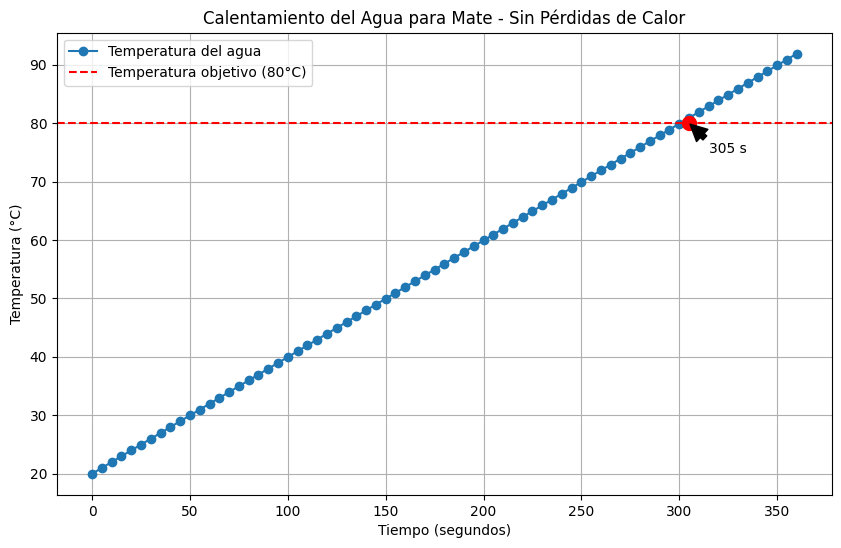

In [8]:
# Crear la gráfica
plt.figure(figsize=(10, 6))

# Gráfico de línea
plt.plot(tiempo, temperaturas, label='Temperatura del agua', marker='o', linestyle='-')

# Añadir línea de temperatura objetivo
plt.axhline(y=temp_objetivo, color='r', linestyle='--', 
            label=f'Temperatura objetivo ({temp_objetivo}°C)')

# Añadir punto donde se alcanza la temperatura objetivo (si se alcanza)
if np.max(temperaturas) >= temp_objetivo:
    plt.plot(tiempo_objetivo, temp_objetivo, 'ro', markersize=10)
    plt.annotate(f'{tiempo_objetivo} s', 
                 xy=(tiempo_objetivo, temp_objetivo),
                 xytext=(tiempo_objetivo+10, temp_objetivo-5),
                 arrowprops=dict(facecolor='black', shrink=0.05))

# Personalizar gráfico
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Temperatura (°C)')
plt.title('Calentamiento del Agua para Mate - Sin Pérdidas de Calor')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()